# importing all the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier




# import the dataset

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print('Number of empty values ')
print('For Train DataSet')
print(train.isna().sum())
print('---------------------------------------------------------------')
print('For Test DataSet')
print(test.isna().sum())

Number of empty values 
For Train DataSet
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
---------------------------------------------------------------
For Test DataSet
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [4]:
train.shape,test.shape

((614, 13), (367, 12))

<AxesSubplot:>

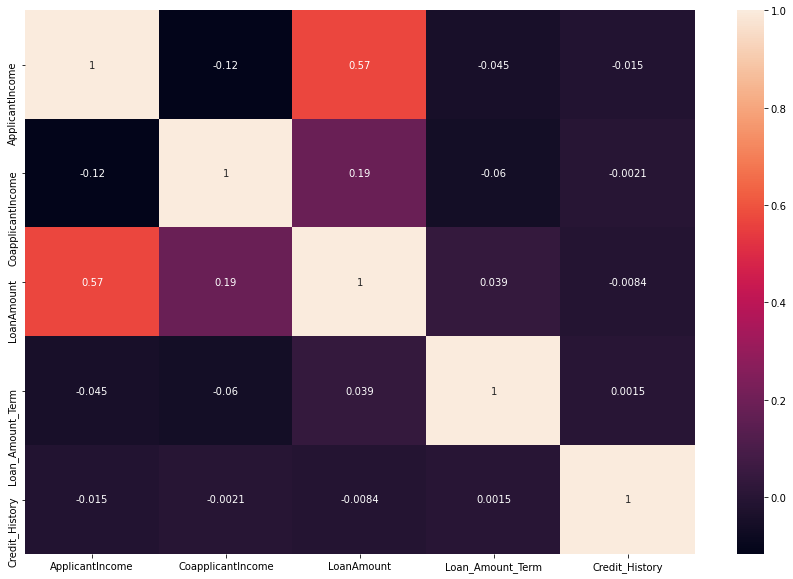

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True)

<Figure size 1080x720 with 0 Axes>

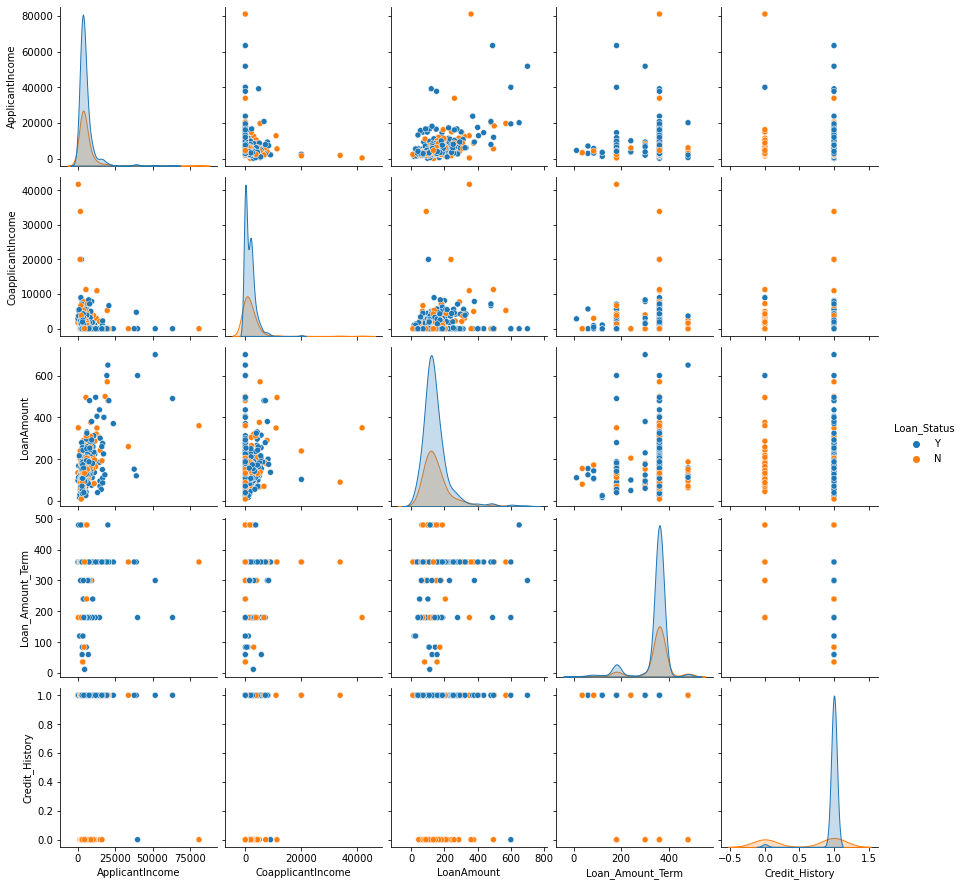

In [6]:
plt.figure(figsize=(15,10))
sns.pairplot(train,hue='Loan_Status')

# Filling Missing Values

#### For gender missing value

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

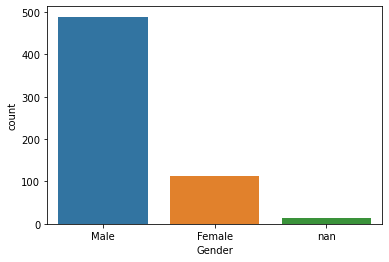

In [8]:
sns.countplot(train.Gender.astype(str))

In [9]:
# Filling the missign data with mode of that column
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

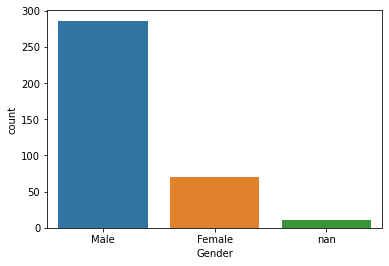

In [10]:
sns.countplot(test.Gender.astype(str))

In [11]:
# Filling the missign data with mode of that column

test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])

In [12]:
train.Gender.isna().sum(),test.Gender.isna().sum()

(0, 0)

#### Filling Married missing data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

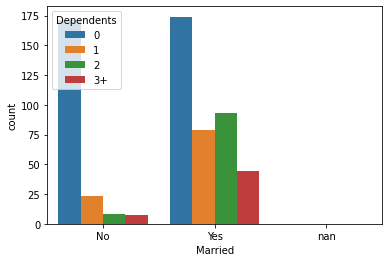

In [13]:
sns.countplot(train['Married'].astype(str),data=train,hue='Dependents')

In [14]:
train[train['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [15]:
train['Married']=train['Married'].fillna('Yes')

In [16]:
train.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

#### Filling Dependents missing data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

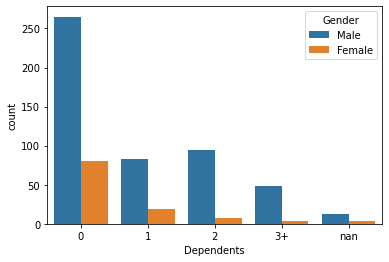

In [17]:
sns.countplot(train['Dependents'].astype(str),data=train,hue='Gender')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

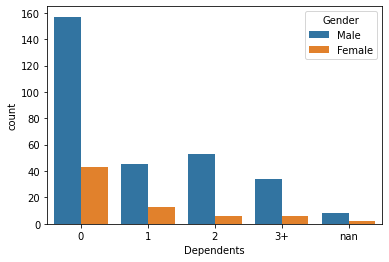

In [18]:
sns.countplot(test['Dependents'].astype(str),data=test,hue='Gender')

In [19]:
train[train['Dependents'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [20]:
# Filling the missign data with mode of that column

train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])



#### Filling Self Employed missing data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

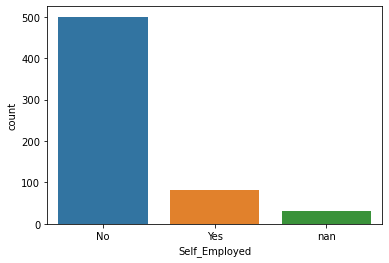

In [21]:
sns.countplot(train['Self_Employed'].astype(str))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

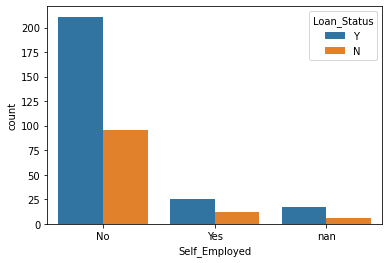

In [22]:
sns.countplot(test['Self_Employed'].astype(str),data=train,hue='Loan_Status')

In [23]:
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])



In [24]:
train['Self_Employed'].isna().sum()

0

####  Filling Loan Amount missing data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

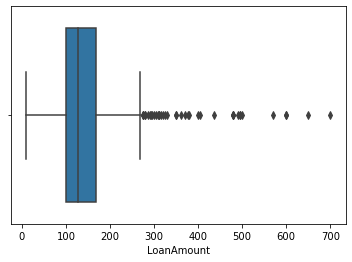

In [25]:
sns.boxplot(train.LoanAmount)

In [26]:
train.LoanAmount=train.LoanAmount.fillna(train.LoanAmount.median())

In [27]:
test.LoanAmount.isna().sum()

5

In [28]:
test['LoanAmount']=test['LoanAmount'].fillna(train.LoanAmount.median())

#### Filling Loan Amount Term missing data

In [29]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

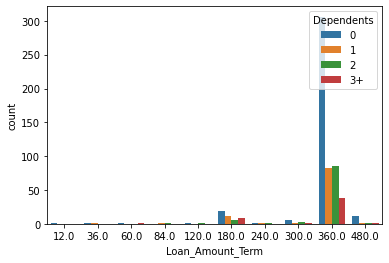

In [30]:
sns.countplot('Loan_Amount_Term',data=train,hue='Dependents')

In [31]:
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])

In [32]:
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])

#### Filling Credit_History missing data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

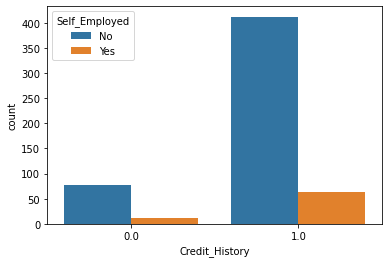

In [33]:
sns.countplot(train['Credit_History'],data=train,hue='Self_Employed')

#try to fill 

In [34]:
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [35]:
test['Credit_History']=test['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [36]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Data preprocessing

In [37]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [38]:
train.drop(labels=['Loan_ID'],axis=1,inplace=True)
test.drop(labels=['Loan_ID'],axis=1,inplace=True)

In [39]:
# save the list of categorical coumns for future use..
#categorical_columns1 = [col for col in train.columns if train[col].dtype == 'int64' ||train[col].dtype == 'float64']
categorical_columns2 = [col for col in train.columns if train[col].dtype == 'object']
categorical_columns2


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [40]:
le=LabelEncoder()
for i in categorical_columns2:
    train[i]=le.fit_transform(train[i])


In [41]:
categorical_columns2.pop()
categorical_columns2

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [42]:
for i in categorical_columns2:
    test[i]=le.fit_transform(test[i])

In [43]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [44]:
#categorical_columns2.pop(categorical_columns2.index('Dependents'))
#categorical_columns2.pop(categorical_columns2.index('Property_Area'))
categorical_columns2

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [45]:
train = pd.get_dummies(train, columns=['Gender', 'Married', 'Education', 'Self_Employed','Dependents','Property_Area'],drop_first=True)
test=pd.get_dummies(test,columns=['Gender', 'Married', 'Education', 'Self_Employed','Dependents','Property_Area'],drop_first=True)

In [46]:
x=train.drop(labels=['Loan_Status'],axis=1)

In [47]:
y=train.Loan_Status

In [48]:
xtrain,xvalid,ytrain,yvalid=train_test_split(x,y,test_size=.3,random_state=0)

In [49]:
xtrain.shape,xvalid.shape,ytrain.shape,yvalid.shape

((429, 14), (185, 14), (429,), (185,))

In [50]:
algos = [LogisticRegression(), DecisionTreeRegressor(), RandomForestClassifier()]

names = ['LogisticRegression', 'Decision Tree Regressor','RandomForestClassifier']
score=[]
roc_auc_list = []

In [51]:
for name in algos:
    model = name
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xvalid)
    rc= roc_auc_score(yvalid, y_pred)
    roc_auc_list.append(rc)
    print(name)
    print(classification_report(yvalid,y_pred))

LogisticRegression()
              precision    recall  f1-score   support

           0       0.89      0.47      0.62        51
           1       0.83      0.98      0.90       134

    accuracy                           0.84       185
   macro avg       0.86      0.72      0.76       185
weighted avg       0.85      0.84      0.82       185

DecisionTreeRegressor()
              precision    recall  f1-score   support

           0       0.39      0.43      0.41        51
           1       0.78      0.75      0.76       134

    accuracy                           0.66       185
   macro avg       0.58      0.59      0.59       185
weighted avg       0.67      0.66      0.66       185

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.71      0.47      0.56        51
           1       0.82      0.93      0.87       134

    accuracy                           0.80       185
   macro avg       0.76      0.70      0.72       185
weig

In [52]:
evaluation = pd.DataFrame({'Model': names,
                           'ROC_AUC': roc_auc_list})

In [53]:
evaluation

,Model,ROC_AUC
0,LogisticRegression,0.724100
1,Decision Tree Regressor,0.588821
2,RandomForestClassifier,0.697981


In [54]:
le=LogisticRegression()
le.fit(xtrain, ytrain)

LogisticRegression()

In [55]:
ypred=le.predict(xvalid)

In [56]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(yvalid,ypred, labels=[1,0])
matrix

array([[131,   3],
       [ 27,  24]], dtype=int64)

In [57]:
print(classification_report(yvalid,ypred))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62        51
           1       0.83      0.98      0.90       134

    accuracy                           0.84       185
   macro avg       0.86      0.72      0.76       185
weighted avg       0.85      0.84      0.82       185



Text(0, 0.5, 'True Positive Rate')

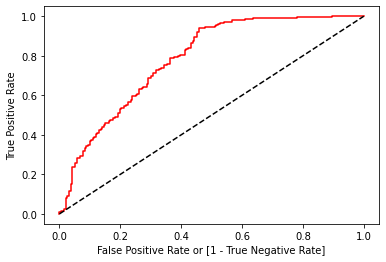

In [58]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, le.predict_proba (x)[:,1])

auc = roc_auc_score(yvalid, ypred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [73]:

model = LogisticRegression() 
model.fit(x,y)
final_predictions = model.predict(test)



In [60]:
result=[]
for i in final_predictions:
    if i == 1:
        i='Y'
    else:
        i='N'
    result.append(i)

In [61]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')
submission['Loan_Status'] = result
submission.to_csv('my_submission1.csv', index=False)